In [2]:
import pandas as pd
df = pd.read_csv('smoking.csv')
df = df[:4000]

In [3]:
df.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [4]:
df = df.drop(['ID','height(cm)','oral'], axis=1)

In [5]:
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == 'Y' else 0)

In [6]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [7]:
df.head

<bound method NDFrame.head of       gender  age  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0          0   40          60       81.3             1.2              1.0   
1          0   40          60       81.0             0.8              0.6   
2          1   55          60       80.0             0.8              0.8   
3          1   40          70       88.0             1.5              1.5   
4          0   40          60       86.0             1.0              1.0   
...      ...  ...         ...        ...             ...              ...   
3995       1   45          70       90.2             1.0              1.2   
3996       1   25          65       76.0             0.9              1.2   
3997       1   50          65       82.0             1.0              1.0   
3998       1   20          75       77.4             1.5              1.5   
3999       1   40          85       88.0             1.5              1.5   

      hearing(left)  hearing(right)  systolic

In [8]:
df.dtypes

gender                   int64
age                      int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object

In [9]:
variabili_pca = list(df.columns[:-1])
print(variabili_pca)

['gender', 'age', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variabili_pca])
scaled_data # nuovo dataset con standardizzate le colonne

array([[-1.3119026 , -0.35607633, -0.44684726, ..., -0.25578427,
        -0.51480301,  0.89543386],
       [-1.3119026 , -0.35607633, -0.44684726, ..., -0.43391735,
        -0.51480301,  0.89543386],
       [ 0.76225171,  0.89918687, -0.44684726, ..., -0.35474709,
        -0.51480301, -1.11677706],
       ...,
       [ 0.76225171,  0.48076581, -0.05547677, ..., -0.37453966,
        -0.51480301,  0.89543386],
       [ 0.76225171, -2.02976059,  0.72726421, ..., -0.5724653 ,
        -0.51480301,  0.89543386],
       [ 0.76225171, -0.35607633,  1.51000519, ..., -0.37453966,
         1.94249059,  0.89543386]])

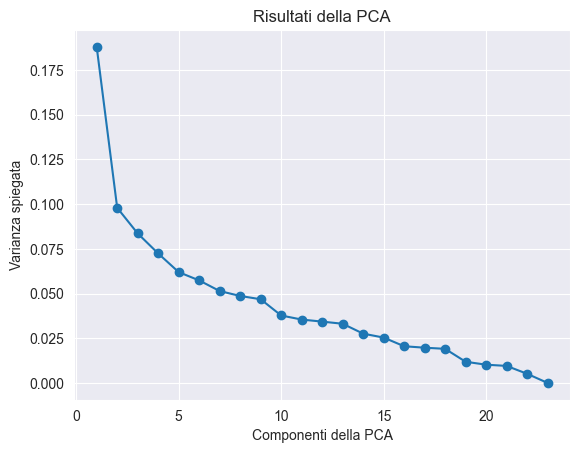

In [11]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [12]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=10).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.18781919 0.0979659  0.08366396 0.0724738  0.06205746 0.0574264
 0.05148827 0.04873612 0.04691056 0.03783448]


In [13]:
sum = 0
for data in pca.explained_variance_ratio_:
    sum += data
print(sum)

0.7463761420411436


In [14]:
pca_df = pd.DataFrame(abs(pca.components_[:10]), columns=df.columns[:-1],
                     index=['PC1','PC2','PC3','PC4','PC5',
                            'PC6','PC7','PC8','PC9','PC10'])
pca_df

,gender,age,weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
PC1,0.347773,0.101741,0.381396,0.352710,0.088102,0.076970,0.016496,0.016940,0.211806,0.228061,...,0.216289,0.069220,0.336498,0.053697,0.201000,0.198181,0.294169,0.239562,0.054313,0.059994
PC2,0.199088,0.427501,0.153926,0.015233,0.331913,0.291495,0.267243,0.266589,0.258101,0.213745,...,0.064622,0.117971,0.134739,0.077628,0.169200,0.247671,0.154791,0.207359,0.099910,0.088571
PC3,0.087703,0.065637,0.016891,0.031669,0.042173,0.053276,0.173979,0.183435,0.073132,0.012975,...,0.109276,0.654114,0.019617,0.061451,0.028227,0.059416,0.009162,0.066696,0.006276,0.043912
PC4,0.082019,0.134934,0.130004,0.177568,0.016348,0.035955,0.239818,0.228522,0.265099,0.223806,...,0.193638,0.102011,0.058842,0.103515,0.107164,0.516433,0.428858,0.400896,0.042661,0.042239
PC5,0.108037,0.060542,0.024060,0.046406,0.001953,0.063162,0.398377,0.409881,0.483913,0.515292,...,0.221819,0.147799,0.055417,0.083936,0.217487,0.051314,0.062453,0.004618,0.024330,0.030139
PC6,0.004577,0.068704,0.094095,0.152604,0.448261,0.461163,0.342249,0.343319,0.190607,0.201034,...,0.334161,0.033310,0.001055,0.110404,0.096943,0.111540,0.033627,0.081601,0.049274,0.051252
PC7,0.050021,0.153023,0.032768,0.004321,0.253821,0.136421,0.134351,0.139462,0.057293,0.070563,...,0.106589,0.010293,0.069253,0.271440,0.178001,0.032041,0.032513,0.027884,0.598603,0.557587
PC8,0.285241,0.115339,0.050605,0.053322,0.285833,0.403619,0.003620,0.004309,0.044611,0.048728,...,0.291256,0.053192,0.270975,0.084248,0.302638,0.072990,0.011965,0.062663,0.198016,0.256057
PC9,0.049944,0.164491,0.141712,0.121719,0.066713,0.141504,0.113541,0.130178,0.022383,0.009576,...,0.112143,0.001117,0.000478,0.635918,0.376992,0.098869,0.193744,0.046972,0.285739,0.307791
PC10,0.242433,0.103960,0.280760,0.319961,0.042348,0.016967,0.041988,0.019461,0.043312,0.026958,...,0.141327,0.038534,0.275392,0.578161,0.231100,0.012989,0.074418,0.133099,0.096054,0.058046


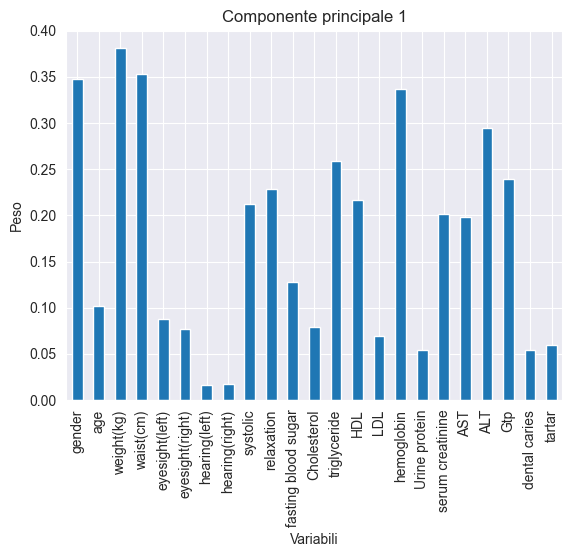

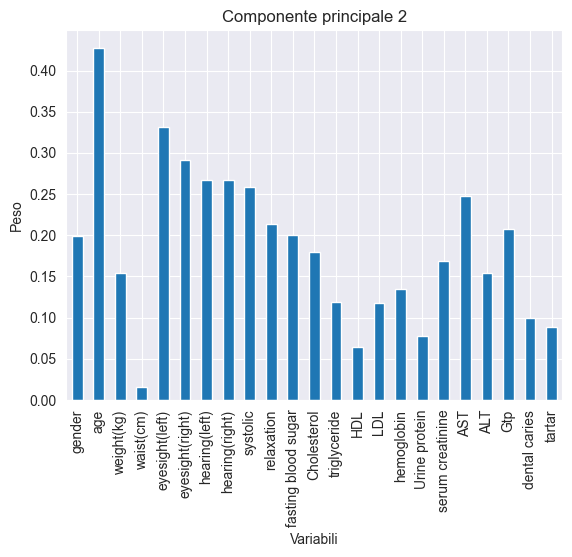

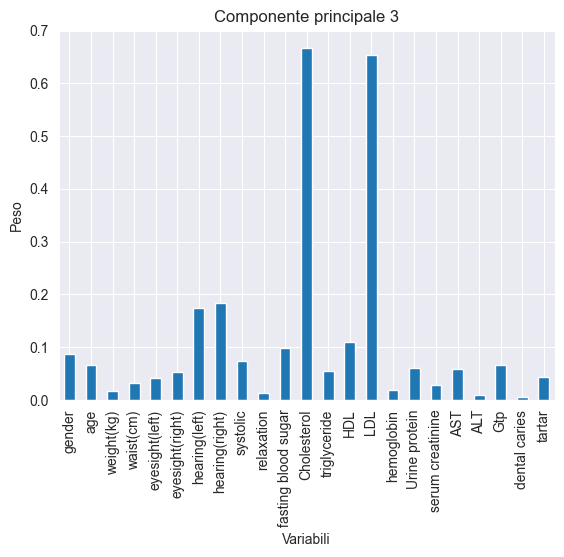

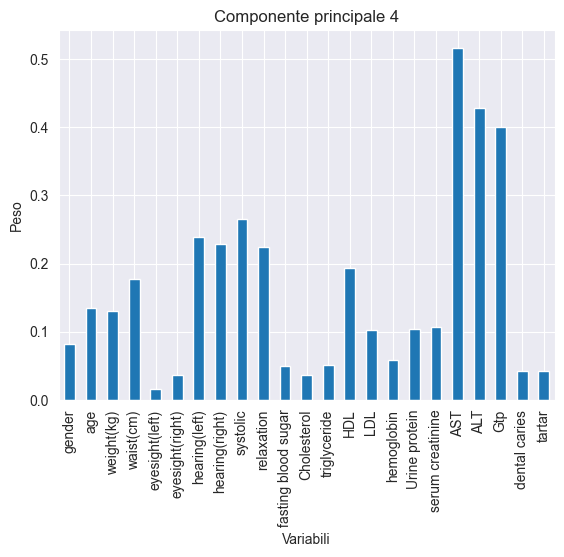

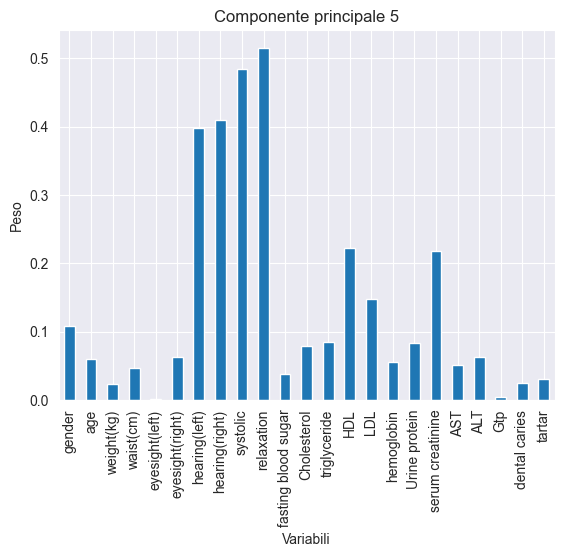

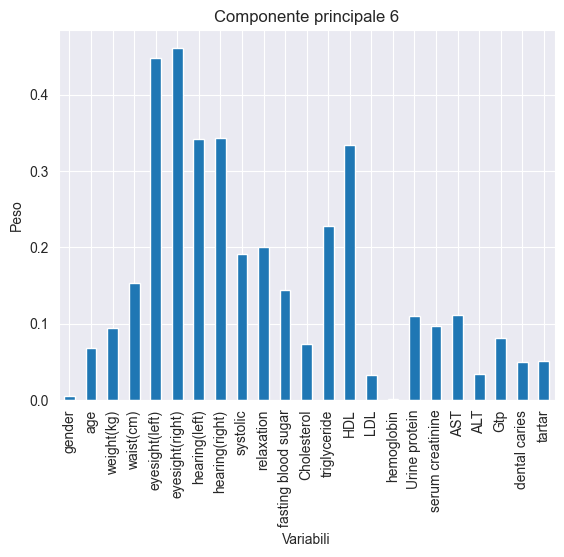

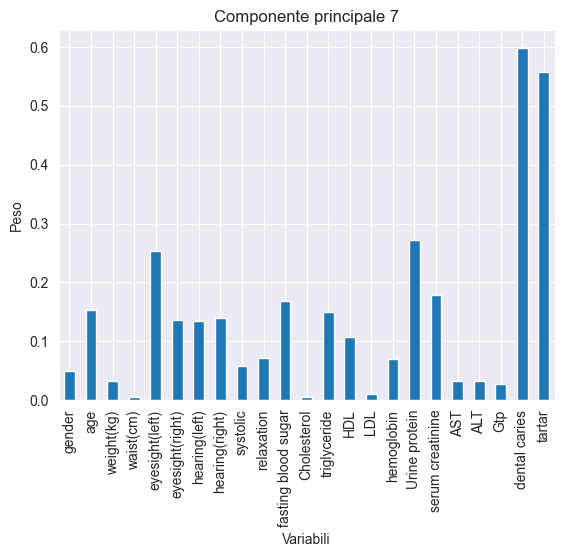

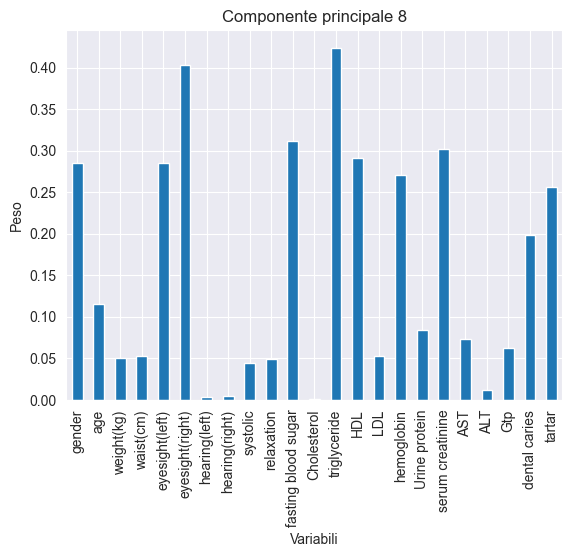

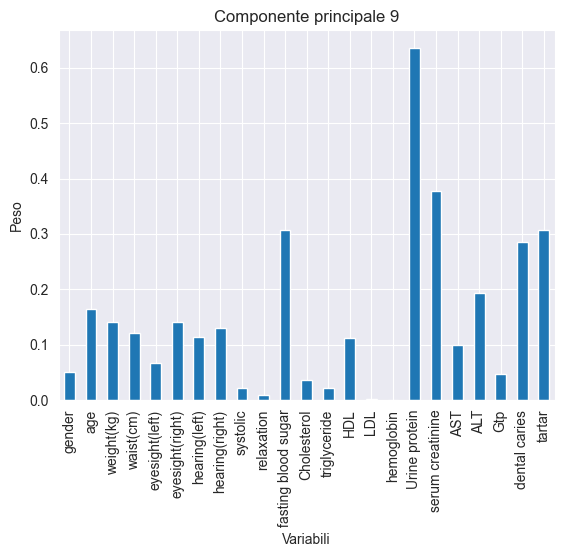

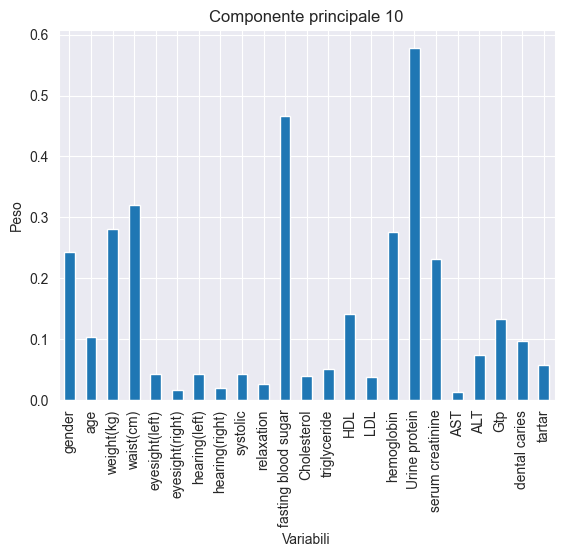

In [15]:
for i in range(10):
    ax = pca_df.iloc[i].plot(kind='bar')
    ax.set_xlabel('Variabili')
    ax.set_ylabel('Peso')
    ax.set_title('Componente principale {}'.format(i+1))
    plt.show()

In [16]:
# crea un nuovo dataframe con le componenti principali
df_pca = pd.DataFrame(data = pca_data,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

# aggiungi la colonna target al nuovo dataframe
df_pca['target'] = df['smoking']

In [17]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-1.905575,0.207993,-1.031936,0.333196,-0.381401,0.344674,-0.305036,0.511554,-0.084588,-0.372853,0
1,-1.409681,-0.621479,-0.145285,-0.119478,-0.010909,-1.591815,-0.157837,1.366209,0.017188,-0.129805,0
2,0.636786,-1.095964,-1.438634,-1.506303,-0.726337,-0.147951,0.796187,-1.049661,-0.098792,0.588567,1
3,1.212347,1.059372,-4.888351,-0.453935,2.694826,-0.310043,0.728669,1.452714,-0.102510,0.220821,0
4,-2.110939,0.141461,0.090018,-0.180004,-0.775116,-0.032602,0.587734,0.070137,-1.185180,-1.271168,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,0.875530,1.085723,-1.224666,-0.139696,1.775812,-0.982659,0.183523,0.304415,0.081476,0.611566,1
3996,-0.339075,1.986364,0.535862,0.095858,0.486268,0.245028,0.805387,-1.795958,-0.000231,1.091873,1
3997,0.385893,-0.013506,-0.549662,-0.426459,-0.176061,0.051491,-0.084709,-0.356230,0.540626,0.672463,0
3998,0.391165,3.438500,2.188864,-0.093849,-0.478286,1.062680,-0.242863,-0.795269,-0.099916,0.373565,1


In [18]:
df_pca.shape

(4000, 11)

In [19]:
df.shape

(4000, 24)

In [20]:
from sklearn.model_selection import train_test_split

# Supponendo che l'ultima colonna contenga l'etichetta di classe
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:, :-1], df_pca.iloc[:, -1], test_size=0.3, random_state=42)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=5, verbose=1, validation_data=(X_test, y_test))


# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/200


ValueError: in user code:

    File "C:\Users\claud\PycharmProjects\MLProject\venv\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\claud\PycharmProjects\MLProject\venv\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\claud\PycharmProjects\MLProject\venv\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\claud\PycharmProjects\MLProject\venv\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\claud\PycharmProjects\MLProject\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\claud\PycharmProjects\MLProject\venv\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 6), found shape=(5, 10)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Fai le predizioni sul set di test
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred_binary)

# Stampa la matrice di confusione
print("Matrice di Confusione:")
print(cm)

In [ ]:
# Fai le predizioni sul set di test
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Applica l'arrotondamento manualmente

# Calcola e stampa le metriche
print(f'Accuracy: {accuracy_score(y_true, y_pred_binary)}')
print(f'Precision: {precision_score(y_true, y_pred_binary)}')
print(f'Recall: {recall_score(y_true, y_pred_binary)}')
print(f'F1-score: {f1_score(y_true, y_pred_binary)}')